In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
import mne
import random
from sklearn.metrics import classification_report
from numpy import zeros, newaxis
from scipy import signal
from scipy import fftpack


Bad key "text.kerning_factor" on line 4 in
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [8]:
MDD_dataset_Filenames = os.listdir('./full_dataset/MDD/EC/')
H_dataset_Filenames = os.listdir('./full_dataset/H/EC/')

MDD_dataset_list = []
H_dataset_list = []

for filename in MDD_dataset_Filenames:
    data = mne.io.read_raw_edf('./full_dataset/MDD/EC/' + str(filename))
    MDD_dataset_list.append(data)  
    
for filename in H_dataset_Filenames:
    data = mne.io.read_raw_edf('./full_dataset/H/EC/' + str(filename))
    H_dataset_list.append(data)  


Extracting EDF parameters from C:\ARK\python\MDD\full_dataset\MDD\EC\MDD S1 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\ARK\python\MDD\full_dataset\MDD\EC\MDD S10 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\ARK\python\MDD\full_dataset\MDD\EC\MDD S11  EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\ARK\python\MDD\full_dataset\MDD\EC\MDD S13 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\ARK\python\MDD\full_dataset\MDD\EC\MDD S14 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\ARK\python\MDD\full_dataset\MDD\EC\MDD S15 EC.edf...
EDF file detected
Setting channel info structure...
Creating ra

In [11]:
MDD_dataset_list[0:27]
H_dataset_list[0:27]
MDD_dataset_list[0].ch_names

['EEG Fp1-LE',
 'EEG F3-LE',
 'EEG C3-LE',
 'EEG P3-LE',
 'EEG O1-LE',
 'EEG F7-LE',
 'EEG T3-LE',
 'EEG T5-LE',
 'EEG Fz-LE',
 'EEG Fp2-LE',
 'EEG F4-LE',
 'EEG C4-LE',
 'EEG P4-LE',
 'EEG O2-LE',
 'EEG F8-LE',
 'EEG T4-LE',
 'EEG T6-LE',
 'EEG Cz-LE',
 'EEG Pz-LE',
 'EEG A2-A1']

In [21]:
MDD_dataframe = [] #MDD 환자의 데이터프레임 리스트
H_dataframe = [] #건강한 사람의 데이터프레임 리스트
y = []
for raw in MDD_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(T_data, columns = channels, index = time)
    MDD_dataframe.append(temp.iloc[:30720]) #256 * 120 = 2min
    y.append(1)
    
for raw in H_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(temp)
    H_dataframe.append(temp.iloc[:30720]) #256 * 120 = 2min
    y.append(0)
y = np.asarray(y)    
MDD_dataframe[0]

,EEG Fp1-LE,EEG F3-LE,EEG C3-LE,EEG P3-LE,EEG O1-LE,EEG F7-LE,EEG T3-LE,EEG T5-LE,EEG Fz-LE,EEG Fp2-LE,EEG F4-LE,EEG C4-LE,EEG P4-LE,EEG O2-LE,EEG F8-LE,EEG T4-LE,EEG T6-LE,EEG Cz-LE,EEG Pz-LE,EEG A2-A1
0.000000,3.850294e-06,-0.000002,-0.000002,-5.500420e-07,-1.650126e-06,-7.450568e-06,4.500343e-07,-2.450187e-06,2.750210e-06,4.550347e-06,5.000381e-08,3.550271e-06,0.000007,2.500191e-07,5.450416e-06,0.000006,0.000003,2.500191e-07,0.000003,2.450187e-06
0.003906,2.250172e-06,-0.000004,-0.000001,3.500267e-07,-1.500114e-07,-7.750591e-06,-1.150088e-06,-2.450187e-06,4.500343e-07,2.650202e-06,-2.550195e-06,3.750286e-06,0.000008,2.050156e-06,8.550652e-06,0.000007,0.000004,-5.500420e-07,0.000006,2.050156e-06
0.007812,-5.000381e-08,-0.000005,-0.000002,8.500649e-07,5.500420e-07,-5.250401e-06,-2.650202e-06,-2.250172e-06,-2.250172e-06,5.000381e-08,-4.950378e-06,2.950225e-06,0.000008,3.450263e-06,8.950683e-06,0.000008,0.000005,-1.750134e-06,0.000006,2.350179e-06
0.011719,-2.350179e-06,-0.000005,-0.000002,1.050080e-06,9.500725e-07,-2.050156e-06,-3.750286e-06,-2.050156e-06,-4.450340e-06,-2.250172e-06,-5.950454e-06,2.350179e-06,0.000007,4.250324e-06,6.750515e-06,0.000006,0.000005,-2.750210e-06,0.000005,3.250248e-06
0.015625,-3.650278e-06,-0.000005,-0.000002,9.500725e-07,1.150088e-06,-1.500114e-07,-4.550347e-06,-1.650126e-06,-5.450416e-06,-3.450263e-06,-5.350408e-06,2.450187e-06,0.000005,4.750362e-06,3.250248e-06,0.000003,0.000006,-3.150240e-06,0.000003,4.450340e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119.980469,-1.350103e-06,0.000004,0.000003,5.500420e-07,1.150088e-06,2.650202e-06,2.150164e-06,7.500572e-07,3.450263e-06,1.850141e-06,3.050233e-06,4.500343e-07,0.000002,4.150317e-06,6.350484e-06,0.000006,0.000004,1.450111e-06,0.000002,1.950149e-06
119.984375,-1.050080e-06,0.000003,0.000004,1.950149e-06,2.150164e-06,2.450187e-06,3.050233e-06,2.050156e-06,2.050156e-06,7.500572e-07,2.250172e-06,-1.650126e-06,0.000002,3.950301e-06,4.750362e-06,0.000007,0.000004,5.000381e-08,0.000003,1.650126e-06
119.988281,4.500343e-07,0.000002,0.000005,3.950301e-06,2.650202e-06,2.450187e-06,5.250401e-06,3.350256e-06,1.750134e-06,5.000381e-08,2.850217e-06,-1.250095e-06,0.000004,3.850294e-06,2.350179e-06,0.000007,0.000005,1.500114e-07,0.000005,1.050080e-06
119.992188,2.050156e-06,0.000002,0.000007,6.050462e-06,2.650202e-06,2.550195e-06,7.550576e-06,4.650355e-06,2.250172e-06,-2.500191e-07,4.250324e-06,1.550118e-06,0.000006,3.750286e-06,4.500343e-07,0.000008,0.000006,1.550118e-06,0.000007,6.500496e-07


In [42]:
low_pass_filter = signal.firwin(101, cutoff=32, fs=256, pass_zero='lowpass')
high_pass_filter = signal.firwin(101, cutoff=0.5, fs=256, pass_zero='highpass')

In [57]:
for j in range(0, len(MDD_dataframe)):
    col = list(MDD_dataframe[j].columns)
    for i in range(0, len(col)):
        clear_eeg = signal.lfilter(low_pass_filter, [1.0], MDD_dataframe[j][col[i]])
        clear_eeg = signal.lfilter(high_pass_filter, [1.0], clear_eeg)
        MDD_dataframe[j][col[i]] = clear_eeg

In [58]:
for j in range(0, len(H_dataframe)):
    col = list(H_dataframe[j].columns)
    for i in range(0, len(col)):
        clear_eeg = signal.lfilter(low_pass_filter, [1.0], H_dataframe[j][col[i]])
        clear_eeg = signal.lfilter(high_pass_filter, [1.0], clear_eeg)
        H_dataframe[j][col[i]] = clear_eeg

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0, 5000)

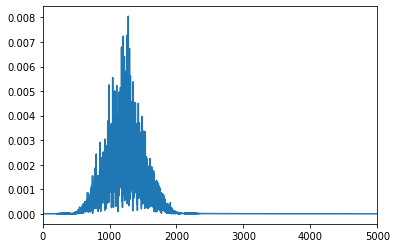

In [75]:
delta_pass_filter =  signal.firwin(101, cutoff=[0.5,4], fs=256, pass_zero='bandpass')
theta_pass_filter =  signal.firwin(101, cutoff=[4,8], fs=256, pass_zero='bandpass')
alpha_pass_filter =  signal.firwin(101, cutoff=[8,13], fs=256, pass_zero='bandpass')
beta_pass_filter =  signal.firwin(101, cutoff=[13,30], fs=256, pass_zero='bandpass')

def band_power(channel):
    df = pd.DataFrame()
    df['delta'] = signal.lfilter(delta_pass_filter, [1.0], channel)
    df['theta'] = signal.lfilter(theta_pass_filter, [1.0], channel)
    df['alpha'] = signal.lfilter(alpha_pass_filter, [1.0], channel)
    df['beta'] = signal.lfilter(beta_pass_filter, [1.0], channel)
    
    return df

temp = band_power(MDD_dataframe[0]['EEG Fp1-LE'])


In [ ]:
H_fft_df = np.zeros((1, 7, 30000))
for df in H_dataframe:
    col = list(df.columns)
    fft = abs(fftpack.fft(np.array(df[col[0]])))[:30000]
    for i in range(1, len(col)):
        power = fftpack.fft(np.array(df[col[i]]))
        power = abs(power)
        fft = np.vstack([fft, power[:30000]])
    H_fft_df = np.vstack([H_fft_df[:,:,:], fft[newaxis,:,:]])
H_fft_df = H_fft_df[1:]

In [153]:
all_fft = np.vstack([MDD_fft_df, H_fft_df])
print(all_fft.shape , y.shape)


features = all_fft.reshape(58,30000,7)
target = y
features.shape



(58, 7, 30000) (58,)


(58, 30000, 7)

In [159]:
from keras import models
from keras import layers
from keras import backend as K

accuracy_scores = []
prec_scores = []
rec_scores = []
f1_scores = []

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=3)
for train, test in kfold.split(features, target):
    k_model = models.Sequential()

    k_model.add(layers.Dense(1, activation = 'sigmoid'))
    
    k_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', recall_m, precision_m, f1_m])
    
    k_model.fit(features[train], target[train], epochs=10, batch_size=512, verbose=0)
    
    scores = k_model.evaluate(features[test], target[test], verbose=0)
    
    print("%s: %.2f%%" % (k_model.metrics_names[1], scores[1]*100))
    print("%s: %.2f%%" % (k_model.metrics_names[2], scores[2]*100))
    print("%s: %.2f%%" % (k_model.metrics_names[3], scores[3]*100))
    print("%s: %.2f%%" % (k_model.metrics_names[4], scores[4]*100))
    print("\n")
    accuracy_scores.append(scores[1] * 100)
    prec_scores.append(scores[2])
    rec_scores.append(scores[3])
    f1_scores.append(scores[4])
    
print("%.2f (+/- %.2f%%)" % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print("%.2f (+/- %.2f%%)" % (np.mean(prec_scores), np.std(prec_scores)))
print("%.2f (+/- %.2f%%)" % (np.mean(rec_scores), np.std(rec_scores)))
print("%.2f (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))

IndexError: tuple index out of range

In [132]:
features[train][i]

array([[3.67218015e-03, 1.96008687e-04, 1.75297682e-04, ...,
        1.62042277e-05, 8.02909788e-06, 1.93463471e-05],
       [3.78808899e-03, 8.65287271e-05, 7.67966325e-05, ...,
        6.18513095e-06, 7.88748715e-06, 5.16121682e-06],
       [3.85229389e-03, 3.50912260e-05, 3.82679608e-05, ...,
        1.15896120e-05, 1.18638281e-05, 1.23796553e-06],
       ...,
       [3.71278325e-03, 1.31205885e-04, 1.45640466e-04, ...,
        1.55485331e-05, 1.86408613e-05, 1.30821007e-05],
       [3.73548498e-03, 9.41030022e-05, 1.09909791e-04, ...,
        6.92258111e-06, 8.70650702e-06, 8.54905618e-06],
       [3.74668583e-03, 1.15659392e-04, 1.10602677e-04, ...,
        2.50361293e-06, 1.30259420e-05, 4.51138760e-06]])

In [ ]:
plt.pcolormesh(t, f, np.abs(z))
plt.ylim(0,0.1)ff

In [ ]:
all_df = np.array(MDD_dataframe[0].T)[newaxis,:,:45000]

for i in range(1, len(MDD_dataframe)):
    b = np.array(MDD_dataframe[i].T)
    print(b.shape)
    print(all_df.shape)
    all_df = np.vstack([all_df, b[newaxis,:,:45000]])
    

all_df.shape